In [ ]:
#read in the csv files
import pandas as pd

hospitalization_details = pd.read_csv('/content/Hospitalisation details.csv')

medical_examinations = pd.read_csv('/content/Medical Examinations.csv')

names = pd.read_csv('/content/Names.csv')

In [ ]:
print(f'Hospitalization keys: {hospitalization_details.keys()}')
hospitalization_details.head()

Hospitalization keys: Index(['Customer ID', 'year', 'month', 'date', 'children', 'charges',
       'Hospital tier', 'City tier', 'State ID'],
      dtype='object')


,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [ ]:
print(f'Medical examinations keys: {medical_examinations.keys()}')
medical_examinations.head()

Medical examinations keys: Index(['Customer ID', 'BMI', 'HBA1C', 'Heart Issues', 'Any Transplants',
       'Cancer history', 'NumberOfMajorSurgeries', 'smoker'],
      dtype='object')


,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [ ]:
print(f'Name keys: {names.keys()}')
names.head()

Name keys: Index(['Customer ID', 'name'], dtype='object')


,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


In [ ]:
#will be used to calculate age
from datetime import datetime

#join all three of the data sets into a single data frame, joining on the Customer ID column
originalDf = pd.merge(hospitalization_details, medical_examinations, on='Customer ID')
originalDf = pd.merge(originalDf, names, on='Customer ID')
originalDf.head()

df = originalDf.copy()

#replace "?" value with the mode value of that column
for column in df.columns:
    df[column] = df[column].replace('?', df[column].mode()[0])

#in the "NumberOfMajorSurgeries" column, replace all values of "No major surgery" with '0'
df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].replace('No major surgery', '0')

#convert the values in the "NumberOfMajorSurgeries" column to int instead of string
df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].astype(int)

#print out all of the values of the "month" column
df['month'].unique()

#convert the values in the "month" column to the appropriate month integer
df['month'] = df['month'].replace('Jun', 6)
df['month'] = df['month'].replace('Jul', 7)
df['month'] = df['month'].replace('Aug', 8)
df['month'] = df['month'].replace('Sep', 9)
df['month'] = df['month'].replace('Oct', 10)
df['month'] = df['month'].replace('Nov', 11)
df['month'] = df['month'].replace('Dec', 12)

df['month'].unique()

#convert the values in the "year" column to int instead of string
df['year'] = df['year'].astype(int)

#convert the values in the "date" column to int instead of string
df['date'] = df['date'].astype(int)

# Get the current date
current_date = datetime.now()

for index, row in df.iterrows():
    # Combine year, month, and day into a single string and parse it
    dob_str = f"{row['year']}-{row['month']}-{row['date']}"  # Format as 'YYYY-MM-DD'

    # Parse the date string into a datetime object
    dob = datetime.strptime(dob_str, "%Y-%m-%d")

    # Calculate the age
    age = current_date.year - dob.year

    # Adjust age if birthday hasn't occurred yet this year
    if (current_date.month, current_date.day) < (dob.month, dob.day):
        age -= 1

    #make the "age" variable an integer instead of a float
    age = int(age)

    df.at[index, 'age'] = age

<ipython-input-5-ce148af09608>:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['month'] = df['month'].replace('Dec', 12)


In [ ]:
#replace "?" values with the mode value of that column
for column in df.columns:
    df[column] = df[column].replace('?', df[column].mode()[0])

In [ ]:
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,age
0,Id2335,1992,7,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K",32.0
1,Id2334,1992,11,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P",31.0
2,Id2333,1993,6,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie",31.0
3,Id2332,1992,9,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",32.0
4,Id2331,1998,7,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan",26.0


In [ ]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# algorithms
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

#linear regression
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

#ridge regression
from sklearn.linear_model import Ridge
ridgeReg = Ridge()

#random forrest regressor
from sklearn.ensemble import RandomForestRegressor
rforestReg = RandomForestRegressor()

In [ ]:
# set up the predictos for what the charges will be
predictors = ['Hospital tier', 'City tier', 'Heart Issues', 'Any Transplants', 'Cancer history', 'NumberOfMajorSurgeries', 'smoker']

numericalPredictors = df[['BMI','HBA1C','age']]

#creating a data frame that will hold the predictor values
df2 = pd.DataFrame()

for each_col_name in predictors:
  col_dummy = pd.get_dummies(df[each_col_name], prefix=each_col_name, dtype=int)
  df2 = pd.concat([df2, col_dummy], axis=1)

df2.head()

,Hospital tier_tier - 1,Hospital tier_tier - 2,Hospital tier_tier - 3,City tier_tier - 1,City tier_tier - 2,City tier_tier - 3,Heart Issues_No,Heart Issues_yes,Any Transplants_No,Any Transplants_yes,Cancer history_No,Cancer history_Yes,NumberOfMajorSurgeries_0,NumberOfMajorSurgeries_1,NumberOfMajorSurgeries_2,NumberOfMajorSurgeries_3,smoker_No,smoker_yes
0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0
1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0
2,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
3,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0
4,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0


In [ ]:
# setting up the predictors and target variable (profit)

# X is the data frame of ALL of the predictors
X = pd.concat([df2, numericalPredictors], axis=1)

# y is the target variable which is the column 'charges'
y = df['charges'] #maybe we could make a new column with (or split it into two) with range of target aka min and max estimate


#setting up the training, setting the test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #why did the stratify=y cause an error?

In [ ]:
#algorithms = [logReg, dtree, rforest, gradboost]
algorithms = [linReg, rforestReg, ridgeReg]
r2_scores = []

from sklearn.metrics import r2_score


#looping through each algorithm to train against the data
for each_algorithm in algorithms:
  print(type(each_algorithm).__name__)
  each_algorithm.fit(X_train, y_train)
  y_preds = each_algorithm.predict(X_test) # store prediction output from algorithm
  print('R²: ', r2_score(y_test, y_preds))
  r2_scores.append(r2_score(y_test, y_preds))
  print('RMSE: ', ((y_test - y_preds)**2).mean()**0.5)
  print('MAE: ', (abs(y_test - y_preds)).mean())
  print('\n')


LinearRegression
R²:  0.8536243437326783
RMSE:  4615.105401748688
MAE:  2849.6771891632593


RandomForestRegressor
R²:  0.8777406487825455
RMSE:  4217.821923605037
MAE:  2432.705344793152


Ridge
R²:  0.853635789153342
RMSE:  4614.924965818697
MAE:  2851.8701984809727




In [ ]:
#perform ridge regularizationn on the data
ridgeReg.fit(X_train, y_train)
y_preds = ridgeReg.predict(X_test) # store prediction output from algorithm
print('Ridge')
print('R²: ', r2_score(y_test, y_preds))
#r2_scores.append(r2_score(y_test, y_preds))
print('RMSE: ', ((y_test - y_preds)**2).mean()**0.5)
print('MAE: ', (abs(y_test - y_preds)).mean())
print('\n')

#perform lasso regularization on the data
from sklearn.linear_model import Lasso
lassoReg = Lasso()
lassoReg.fit(X_train, y_train)
y_preds = lassoReg.predict(X_test) # store prediction output from algorithm
print('Lasso')
print('R²: ', r2_score(y_test, y_preds))
r2_scores.append(r2_score(y_test, y_preds))
print('RMSE: ', ((y_test - y_preds)**2).mean()**0.5)
print('MAE: ', (abs(y_test - y_preds)).mean())
print('\n')

#perform elastic net regularization on the data
from sklearn.linear_model import ElasticNet
elasticNetReg = ElasticNet()
elasticNetReg.fit(X_train, y_train)
y_preds = elasticNetReg.predict(X_test) # store prediction output from algorithm
print('Elastic Net')
print('R²: ', r2_score(y_test, y_preds))
r2_scores.append(r2_score(y_test, y_preds))
print('RMSE: ', ((y_test - y_preds)**2).mean()**0.5)
print('MAE: ', (abs(y_test - y_preds)).mean())
print('\n')




Ridge
R²:  0.853635789153342
RMSE:  4614.924965818697
MAE:  2851.8701984809727


Lasso
R²:  0.8536989705445986
RMSE:  4613.9287904167
MAE:  2847.1946618355055


Elastic Net
R²:  0.6439626848232485
RMSE:  7197.72011793962
MAE:  5429.566074744392




In [ ]:
#perform neural network on the data
from sklearn.neural_network import MLPRegressor
neuralNet = MLPRegressor(activation='relu', hidden_layer_sizes=(100, 100), max_iter=1000)
neuralNet.fit(X_train, y_train)
y_preds = neuralNet.predict(X_test) # store prediction output from algorithm
print('Neural Network')
print('R²: ', r2_score(y_test, y_preds))
r2_scores.append(r2_score(y_test, y_preds))
print('RMSE: ', ((y_test - y_preds)**2).mean()**0.5)
print('MAE: ', (abs(y_test - y_preds)).mean())
print('\n')


Neural Network
R²:  0.8585132454432113
RMSE:  4537.379336001381
MAE:  2799.5804434343195




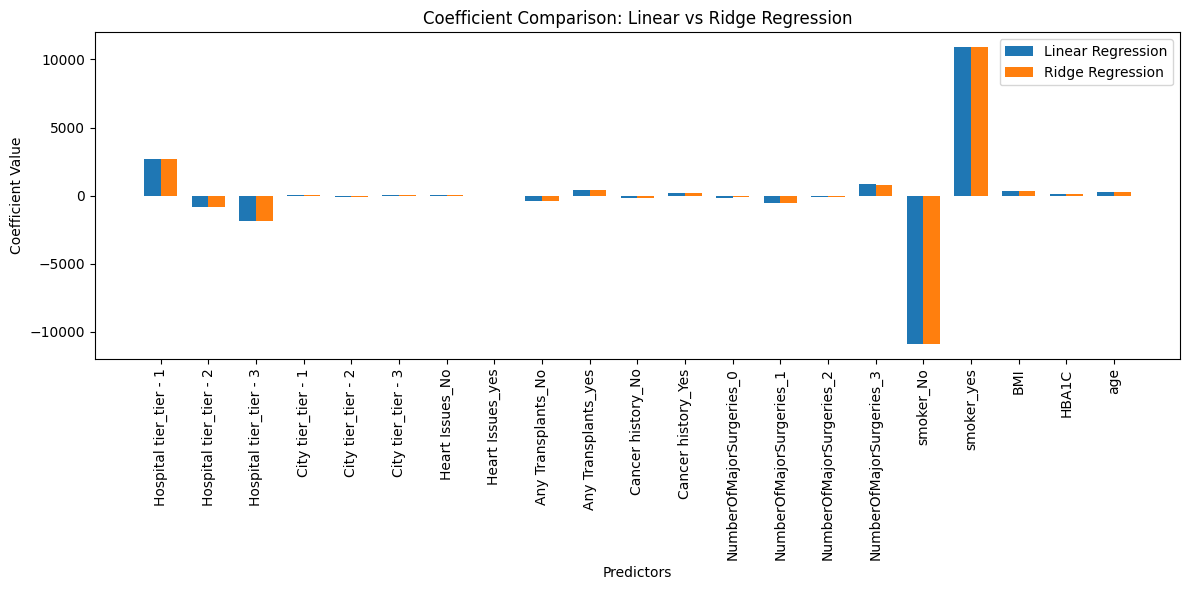

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract coefficients for Linear Regression and Ridge Regression
linear_coeffs = linReg.coef_
ridge_coeffs = ridgeReg.coef_
predictor_names = X.columns

# Plot the coefficients
x = np.arange(len(predictor_names))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, linear_coeffs, width, label='Linear Regression')
plt.bar(x + width/2, ridge_coeffs, width, label='Ridge Regression')

plt.xticks(ticks=x, labels=predictor_names, rotation=90)
plt.title('Coefficient Comparison: Linear vs Ridge Regression')
plt.xlabel('Predictors')
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()
plt.show()


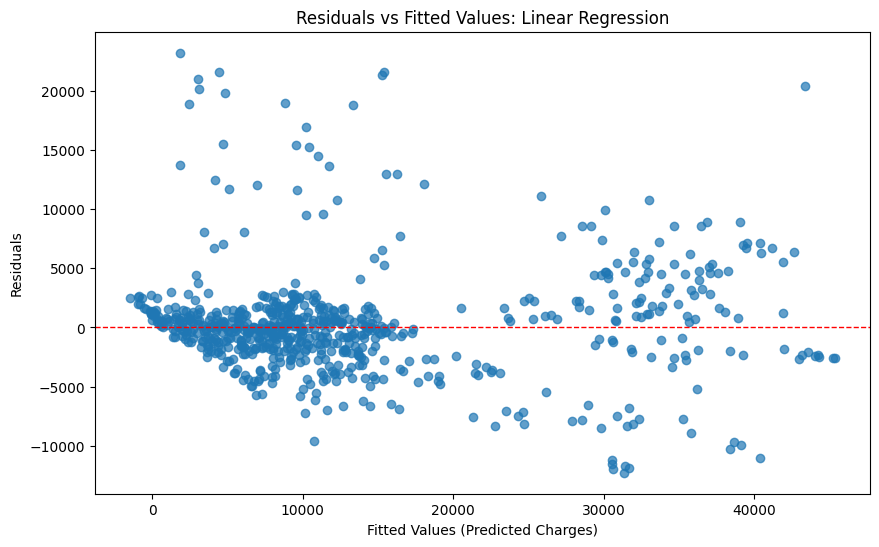

In [ ]:
# Residuals plot for Linear Regression
y_train_pred = linReg.predict(X_train)
y_test_pred = linReg.predict(X_test)

# Plot residuals vs fitted values for test data
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, y_test - y_test_pred, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title('Residuals vs Fitted Values: Linear Regression')
plt.xlabel('Fitted Values (Predicted Charges)')
plt.ylabel('Residuals')
plt.show()


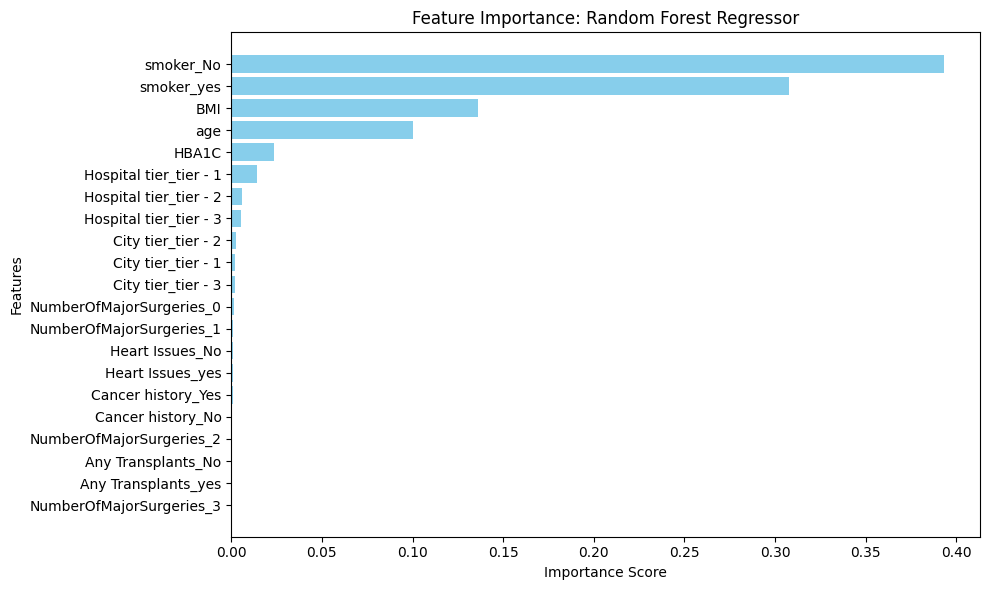

In [ ]:
# Feature Importance Plot for Random Forest Regressor
feature_importances = rforestReg.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)
sorted_features = np.array(predictor_names)[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.title('Feature Importance: Random Forest Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


[0.8536243437326783, 0.8777406487825455, 0.853635789153342, 0.8536989705445986, 0.6439626848232485, 0.8585132454432113]


<ipython-input-17-625cd7ebe0e5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=r2_scores, palette="Set2")


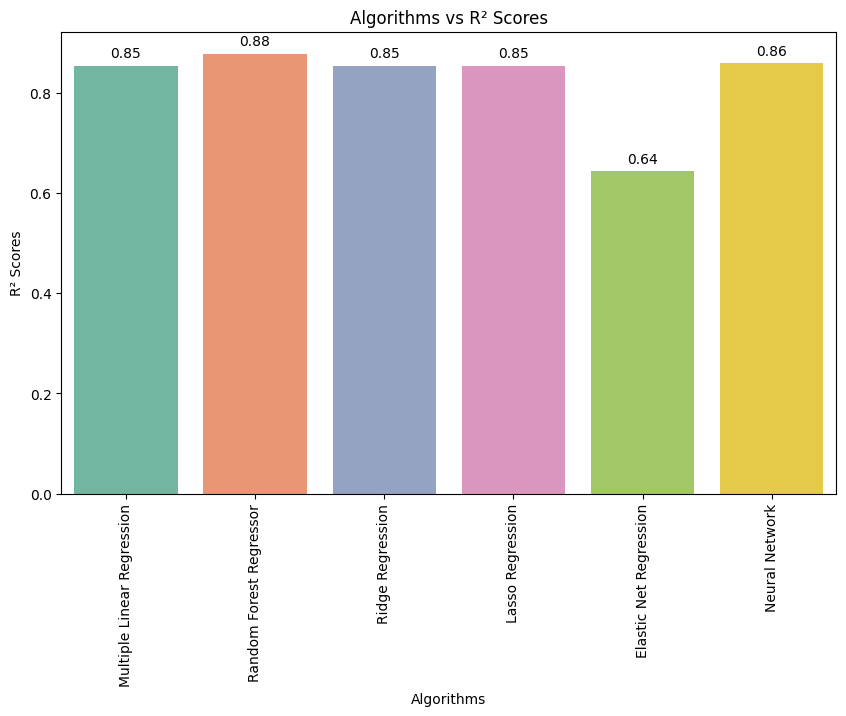

In [ ]:
import seaborn as sns
#barchart of algorithms vs R squared values
algorithms = ['Multiple Linear Regression', 'Random Forest Regressor', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression', 'Neural Network']
print(r2_scores)

plt.figure(figsize=(10, 6))
#barchart of algorithms by r2_scores
sns.barplot(x=algorithms, y=r2_scores, palette="Set2")
plt.title('Algorithms vs R² Scores')
plt.xlabel('Algorithms')
plt.ylabel('R² Scores')
#rotate x-axis labels
plt.xticks(rotation=90)
#add the values to the top
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=10)
plt.show()